In [359]:
import numpy as np 
import pandas as pd 
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [360]:
trainData[136:]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
136,136,09/01/2009,İstanbul,Big Cities,FC,4,5.0,3.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,6363241.0


In [361]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')   
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y')

trainData['OpenDays']=""
testData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')  

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']

trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

In [362]:
trainData['Open Date'].describe()

count                     137
unique                    134
top       2000-01-07 00:00:00
freq                        2
first     1996-05-08 00:00:00
last      2014-01-25 00:00:00
Name: Open Date, dtype: object

In [363]:
trainData["City"] = trainData["City"].map({'İstanbul':0, 'Ankara':1, 'Diyarbakır':2, 'Tokat':3, 'Gaziantep':4,
       'Afyonkarahisar':5, 'Edirne':6, 'Kocaeli':7, 'Bursa':8, 'İzmir':9, 'Sakarya':10,
       'Elazığ':11, 'Kayseri':12, 'Eskişehir':13, 'Şanlıurfa':14, 'Samsun':15, 'Adana':16,
       'Antalya':17, 'Kastamonu':18, 'Uşak':19, 'Muğla':20, 'Kırklareli':21, 'Konya':22,
       'Karabük':23, 'Tekirdağ':24, 'Denizli':25, 'Balıkesir':26, 'Aydın':27, 'Amasya':28,
       'Kütahya':29, 'Bolu':30, 'Trabzon':31, 'Isparta':32, 'Osmaniye':33, 'Niğde':34,
       'Rize':35, 'Düzce':36, 'Hatay':37, 'Erzurum':38, 'Mersin':39, 'Zonguldak':40,
       'Malatya':41, 'Çanakkale':42, 'Kars':43, 'Batman':44, 'Bilecik':45, 'Giresun':46,
       'Sivas':47, 'Kırıkkale':48, 'Mardin':49, 'Erzincan':50, 'Manisa':51,
       'Kahramanmaraş':52, 'Yalova':53, 'Tanımsız':54, 'Kırşehir':55, 'Aksaray':56,
       'Nevşehir':57, 'Çorum':58, 'Ordu':59, 'Artvin':60, 'Siirt':61, 'Çankırı':62}).astype(int)

testData["City"] = testData["City"].map({'İstanbul':0, 'Ankara':1, 'Diyarbakır':2, 'Tokat':3, 'Gaziantep':4,
       'Afyonkarahisar':5, 'Edirne':6, 'Kocaeli':7, 'Bursa':8, 'İzmir':9, 'Sakarya':10,
       'Elazığ':11, 'Kayseri':12, 'Eskişehir':13, 'Şanlıurfa':14, 'Samsun':15, 'Adana':16,
       'Antalya':17, 'Kastamonu':18, 'Uşak':19, 'Muğla':20, 'Kırklareli':21, 'Konya':22,
       'Karabük':23, 'Tekirdağ':24, 'Denizli':25, 'Balıkesir':26, 'Aydın':27, 'Amasya':28,
       'Kütahya':29, 'Bolu':30, 'Trabzon':31, 'Isparta':32, 'Osmaniye':33, 'Niğde':34,
       'Rize':35, 'Düzce':36, 'Hatay':37, 'Erzurum':38, 'Mersin':39, 'Zonguldak':40,
       'Malatya':41, 'Çanakkale':42, 'Kars':43, 'Batman':44, 'Bilecik':45, 'Giresun':46,
       'Sivas':47, 'Kırıkkale':48, 'Mardin':49, 'Erzincan':50, 'Manisa':51,
       'Kahramanmaraş':52, 'Yalova':53, 'Tanımsız':54, 'Kırşehir':55, 'Aksaray':56,
       'Nevşehir':57, 'Çorum':58, 'Ordu':59, 'Artvin':60, 'Siirt':61, 'Çankırı':62}).astype(int)

trainData["Type"] = trainData["Type"].map({"IL":0,"FC":1,"DT":2}).astype(int)
testData["Type"] = testData["Type"].map({"IL":0,"FC":1,"DT":2,"MB":3}).astype(int)

trainData["City Group"] = trainData["City Group"].map({"Big Cities":0, "Other":1}).astype(int)
testData["City Group"] = testData["City Group"].map({"Big Cities":0, "Other":1}).astype(int)

In [364]:
trainData['revenue_log'] = np.log(trainData['revenue'])

In [365]:
# Transform Open date to age
from datetime import datetime


def count_years(open_date):
    date_parse = pd.to_datetime(open_date, format='%m/%d/%Y')
    date_now = datetime.now()
    return date_now.year - date_parse.year

In [366]:
# Transform Open Year
open_years = []
for i in trainData['Open Date']:
    open_years.append(count_years(i))
    
df_open_years = pd.DataFrame({ 'open_years' : open_years } )
group_years = df_open_years['open_years'].value_counts()
trainData = pd.concat([trainData, df_open_years], axis=1).drop(['Open Date'], axis=1)

In [367]:
open_years = []
for i in testData['Open Date']:
    open_years.append(count_years(i))
    
df_open_years = pd.DataFrame({ 'open_years' : open_years } )
group_years = df_open_years['open_years'].value_counts()
testData = pd.concat([testData, df_open_years], axis=1).drop(['Open Date'], axis=1)

In [368]:
trainData

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,revenue_log,open_years
0,0,0,0,0,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,5647,15.547830,21
1,1,1,0,1,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,2513,15.750379,12
2,2,2,1,0,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,663,14.535971,7
3,3,3,1,0,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,1064,14.799651,8
4,4,4,1,0,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,2063,15.278005,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,31,1,1,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,5787594.0,2381,15.571227,12
133,133,9,0,1,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,9262754.0,3003,16.041512,14
134,134,12,1,1,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,2544857.0,3099,14.749585,14
135,135,0,0,1,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,7217634.0,1525,15.792038,10


In [369]:
testData

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays,open_years
0,0,34,1,1,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,1440,9
1,1,22,1,0,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,1385,9
2,2,1,0,1,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,428,7
3,3,7,1,0,2,4.0,4.0,4.0,2,3,...,0,4,0,0,0,0,0,0,605,7
4,4,5,1,1,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,519,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,17,1,1,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,5475,20
99996,99996,34,1,0,1,2.0,4.0,3.0,1,1,...,5,0,0,0,4,0,0,0,1263,9
99997,99997,0,0,0,4,5.0,4.0,4.0,1,2,...,5,5,3,2,4,4,4,2,733,8
99998,99998,0,0,1,12,7.5,6.0,6.0,4,4,...,0,0,0,4,0,0,0,0,446,7


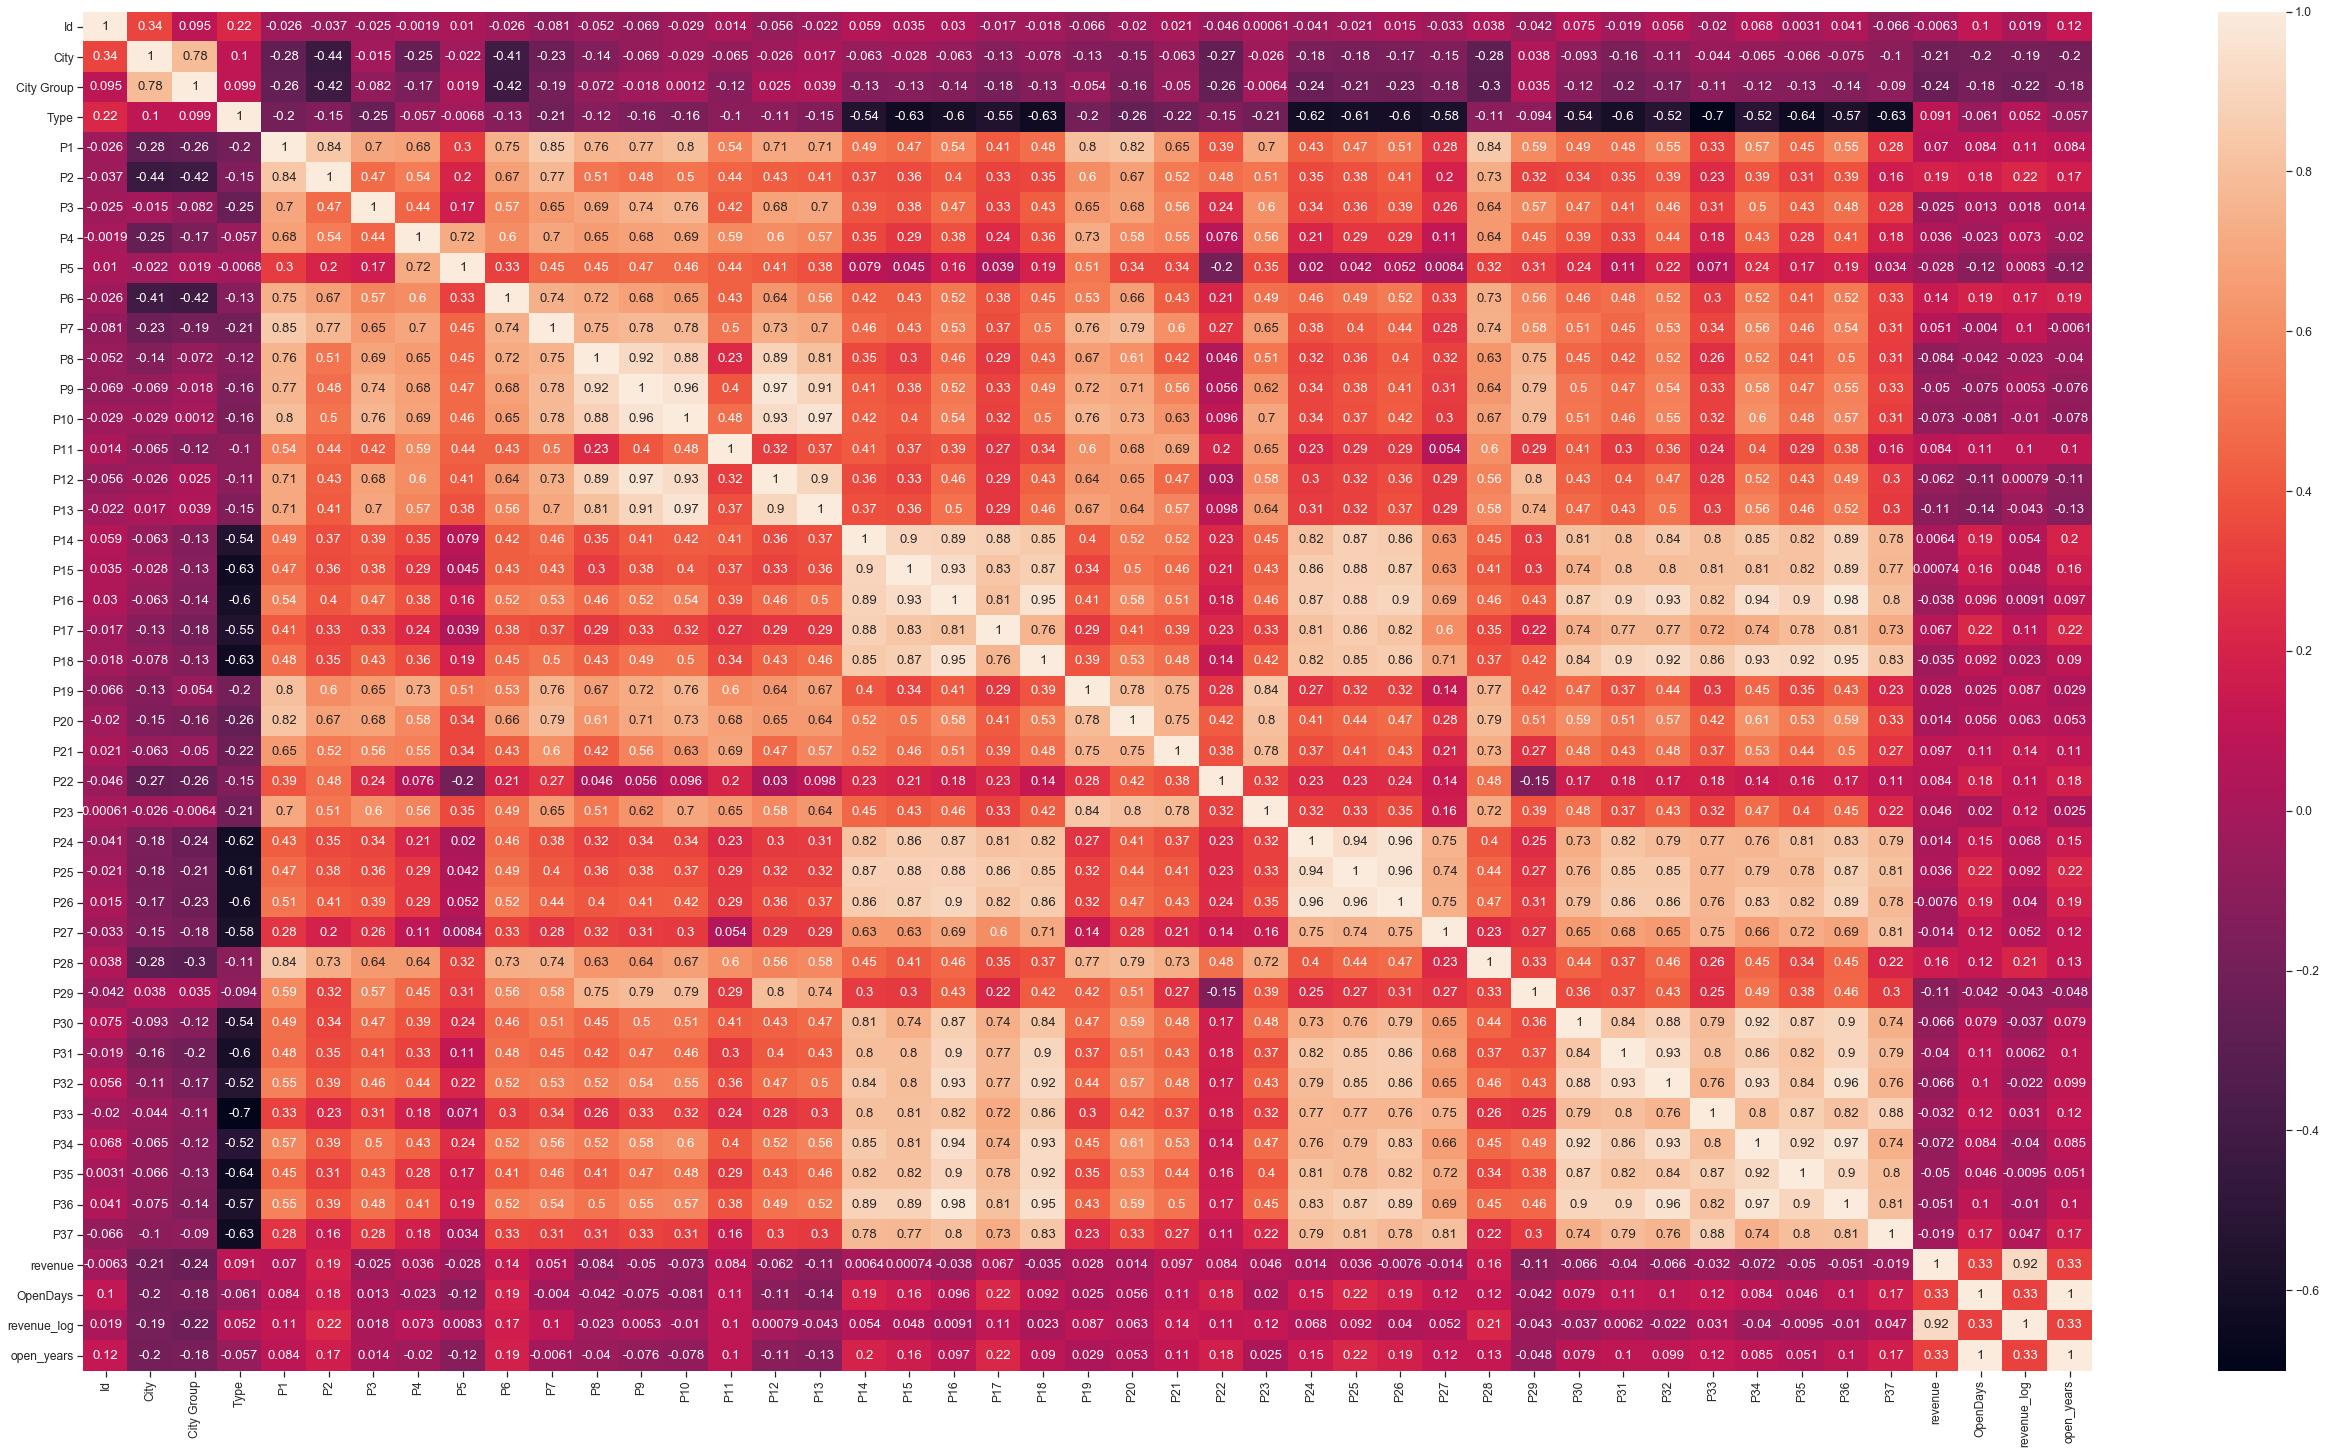

In [370]:
plt.figure(figsize=(45,25))
sns.heatmap(trainData.corr(),annot=True)

In [318]:
## p1, p2, p6, p11, 
##  Type, P1, P2, P6, P11, P14, P15, P17, P19, P20, P21, P22, P23, P24, P25, P28, 
##['Open Date', 'City', 'City Group', 'Type', 'P2', 'P6', 'P7', 'P17', 'P19','P21','P23','P28','revenue_log']
train = trainData.drop(["Id","Open Date", "P1", "P3", "P4", "P5","P8", "P9", "P10","P11","P12","P13","P14","P15","P16","P18", 
                       "P20", "P22","P24","P25","P26","P27","P30", "P31","P32", "P33", "P34", "P35","P36", "P37","revenue_log"], axis=1)
test = testData.drop(["Id","Open Date", "P1", "P3", "P4", "P5","P8", "P9", "P10","P11","P12","P13","P14","P15","P16","P18", 
                       "P20", "P22","P24","P25","P26","P27","P29", "P30", "P31","P32", "P33", "P34", "P35","P36", "P37"] , axis=1)
##test = test.drop(["Id"], axis=1)
##test = test.drop(["Open Date"], axis=1)
##test = test.drop(["Standard_date"], axis=1)

KeyError: "['Open Date'] not found in axis"

In [316]:
train

,City,City Group,Type,P2,P6,P7,P17,P19,P21,P23,P28,P29,revenue,OpenDays
0,0,0,0,5.0,2,5,2,5,1,3,2.0,3.0,5653753.0,5647
1,1,0,1,5.0,2,5,0,3,1,2,3.0,3.0,6923131.0,2513
2,2,1,0,4.0,3,5,0,1,1,1,1.0,3.0,2055379.0,663
3,3,1,0,4.5,4,10,3,20,6,10,2.5,7.5,2675511.0,1064
4,4,1,0,4.0,2,5,1,2,1,1,1.0,3.0,4316715.0,2063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,31,1,1,3.0,2,4,0,4,2,1,2.0,3.0,5787594.0,2381
133,9,0,1,5.0,3,5,0,3,2,1,3.0,3.0,9262754.0,3003
134,12,1,1,4.0,3,5,0,2,1,2,2.0,3.0,2544857.0,3099
135,0,0,1,5.0,2,5,0,1,1,1,3.0,3.0,7217634.0,1525


In [288]:
test

,City,City Group,Type,P2,P6,P7,P17,P19,P21,P23,P28,OpenDays
0,34,1,1,4.0,2,5,2,5,3,4,2.0,1440
1,22,1,0,4.0,2,5,0,5,3,1,1.0,1385
2,1,0,1,4.0,2,5,0,5,5,5,2.0,428
3,7,1,0,4.0,3,5,0,4,3,2,2.0,605
4,5,1,1,4.0,2,5,0,1,3,1,5.0,519
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,17,1,1,5.0,2,5,0,3,1,2,2.0,5475
99996,34,1,0,2.0,1,1,1,1,1,2,1.0,1263
99997,0,0,0,5.0,2,5,3,3,4,5,4.0,733
99998,0,0,1,7.5,4,10,0,20,3,15,7.5,446


In [289]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

import numpy
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),
                      'City Group':trainData['City Group'], 'City':trainData['City'],
                      'P2':trainData['P2'], 'P6':trainData['P6'], 'P7':trainData['P7'],
                      'P17':trainData['P17'], 'P19':trainData['P19'], 'P21':trainData['P21'],
                      'P23':trainData['P23'], 'P28':trainData['P28']})
#xTrain = trainData.drop(['revenue'], axis=1)
#xTrain['OpenDays'] = xTrain['OpenDays'].apply(numpy.log)
yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                      'City Group':testData['City Group'], 'City':testData['City'],
                      'P2':testData['P2'], 'P6':testData['P6'], 'P7':testData['P7'],
                      'P17':testData['P17'], 'P19':testData['P19'], 'P21':testData['P21'],
                      'P23':testData['P23'], 'P28':testData['P28']})
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=150)
cls.fit(xTrain, yTrain)
pred = cls.predict(xTest)
pred = numpy.exp(pred)
cls.score(xTrain, yTrain)

0.87718326557007

In [290]:
xTrain

,OpenDays,City Group,City,P2,P6,P7,P17,P19,P21,P23,P28
0,8.638880,0,0,5.0,2,5,2,5,1,3,2.0
1,7.829233,0,1,5.0,2,5,0,3,1,2,3.0
2,6.496775,1,2,4.0,3,5,0,1,1,1,1.0
3,6.969791,1,3,4.5,4,10,3,20,6,10,2.5
4,7.631917,1,4,4.0,2,5,1,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
132,7.775276,1,31,3.0,2,4,0,4,2,1,2.0
133,8.007367,0,9,5.0,3,5,0,3,2,1,3.0
134,8.038835,1,12,4.0,3,5,0,2,1,2,2.0
135,7.329750,0,0,5.0,2,5,0,1,1,1,3.0


In [291]:
pred = cls.predict(xTest)
pred = numpy.exp(pred)

In [292]:
pred

array([3948780.06661017, 3435875.33897619, 3236973.56649312, ...,
       3147251.25515827, 3256016.34800237, 5703873.96286586])

In [293]:
pred2 = []
for i in range(len(pred)):
    if pred[i] != float('Inf'):
        pred2.append(pred[i])

m = sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('Inf'):
        print("haha")
        pred[i] = m

In [294]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple_2.csv',header=True, index=False)

In [295]:
##  Type, P1, P2, P6, P11, P14, P15, P17, P19, P20, P21, P22, P23, P24, P25, P28, 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

import numpy
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),
                      'P1':trainData['P1'], 'P2':trainData['P2'],
                      'P6':trainData['P6'], 'P11':trainData['P11'], 'P14':trainData['P14'],
                      'P15':trainData['P15'], 'P17':trainData['P17'], 'P19':trainData['P19'],
                      'P20':trainData['P20'], 'P21':trainData['P21'],'P22':trainData['P22'],
                      'P23':trainData['P23'], 'P24':trainData['P24'], 'P25':trainData['P25'],
                      'P28':trainData['P28']})

yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                      'P1':testData['P1'], 'P2':testData['P2'],
                      'P6':testData['P6'], 'P11':testData['P11'], 'P14':testData['P14'],
                      'P15':testData['P15'], 'P17':testData['P17'], 'P19':testData['P19'],
                      'P20':testData['P20'], 'P21':testData['P21'],'P22':testData['P22'],
                      'P23':testData['P23'], 'P24':testData['P24'], 'P25':testData['P25'],
                      'P28':testData['P28']})
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=100)
cls.fit(xTrain, yTrain)
pred2 = cls.predict(xTest)
pred2 = numpy.exp(pred)
cls.score(xTrain, yTrain)

KeyError: 'OpenDays'

In [ ]:
pred = cls.predict(xTest)
pred = numpy.exp(pred)

In [296]:
pred

array([3948780.06661017, 3435875.33897619, 3236973.56649312, ...,
       3147251.25515827, 3256016.34800237, 5703873.96286586])

In [297]:
pred2 = []
for i in range(len(pred)):
    if pred[i] != float('Inf'):
        pred2.append(pred[i])

m = sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('Inf'):
        print("haha")
        pred[i] = m

In [298]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple_3.csv',header=True, index=False)

In [1]:
####P2	P6	P7	P17	P19	P21	P23	P28
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

import numpy
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),
                      'P2':trainData['P2'], 'P6':trainData['P6'],
                      'P7':trainData['P7'], 'P17':trainData['P17'], 'P19':trainData['P19'],
                      'P21':trainData['P21'], 'P23':trainData['P23'], 'P28':trainData['P28']})
#xTrain = trainData.drop(['revenue'], axis=1)
#xTrain['OpenDays'] = xTrain['OpenDays'].apply(numpy.log)
yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                      'P2':testData['P2'], 'P6':testData['P6'],
                      'P7':testData['P7'], 'P17':testData['P17'], 'P19':testData['P19'],
                      'P21':testData['P21'], 'P23.':testData['P23'], 'P28':testData['P28']})
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=100)
cls.fit(xTrain, yTrain)
pred2 = cls.predict(xTest)
pred2 = numpy.exp(pred)
cls.score(xTrain, yTrain)

NameError: name 'pd' is not defined

In [300]:
pred = cls.predict(xTest)
pred = numpy.exp(pred)

In [301]:
pred

array([3948780.06661017, 3435875.33897619, 3236973.56649312, ...,
       3147251.25515827, 3256016.34800237, 5703873.96286586])

In [302]:
pred2 = []
for i in range(len(pred)):
    if pred[i] != float('Inf'):
        pred2.append(pred[i])

m = sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('Inf'):
        print("haha")
        pred[i] = m

In [303]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple_4.csv',header=True, index=False)

In [320]:
##  Type, P1, P2, P6, P11, P14, P15, P17, P19, P20, P21, P22, P23, P24, P25, P28, 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

import numpy
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),
                       'open_years':trainData['open_years'],
                      'P1':trainData['P1'], 'P2':trainData['P2'],
                      'P6':trainData['P6'], 'P11':trainData['P11'], 'P14':trainData['P14'],
                      'P15':trainData['P15'], 'P17':trainData['P17'], 'P19':trainData['P19'],
                      'P20':trainData['P20'], 'P21':trainData['P21'],'P22':trainData['P22'],
                      'P23':trainData['P23'], 'P24':trainData['P24'], 'P25':trainData['P25'],
                      'P28':trainData['P28']})
#xTrain = trainData.drop(['revenue'], axis=1)
#xTrain['OpenDays'] = xTrain['OpenDays'].apply(numpy.log)
yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                      'open_years':testData['open_years'],
                      'P1':testData['P1'], 'P2':testData['P2'],
                      'P6':testData['P6'], 'P11':testData['P11'], 'P14':testData['P14'],
                      'P15':testData['P15'], 'P17':testData['P17'], 'P19':testData['P19'],
                      'P20':testData['P20'], 'P21':testData['P21'],'P22':testData['P22'],
                      'P23':testData['P23'], 'P24':testData['P24'], 'P25':testData['P25'],
                      'P28':testData['P28']})
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=100)
cls.fit(xTrain, yTrain)
pred2 = cls.predict(xTest)
pred2 = numpy.exp(pred)
cls.score(xTrain, yTrain)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


0.8778884107245879

In [321]:
pred = cls.predict(xTest)
pred = numpy.exp(pred)

In [322]:
pred

array([3994795.32638367, 3285693.18399001, 3275275.63853119, ...,
       3270370.08403665, 3280397.78110944, 4823761.99553138])

In [323]:
pred2 = []
for i in range(len(pred)):
    if pred[i] != float('Inf'):
        pred2.append(pred[i])

m = sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('Inf'):
        print("haha")
        pred[i] = m

In [324]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple_5.csv',header=True, index=False)

In [354]:
##  Type, P1, P2, P6, P11, P14, P15, P17, P19, P20, P21, P22, P23, P24, P25, P28, 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

import numpy
xTrain = pd.DataFrame({'open_years':trainData['open_years'],
                      'P1':trainData['P1'], 'P2':trainData['P2'],
                      'P6':trainData['P6'], 'P11':trainData['P11'], 'P14':trainData['P14'],
                      'P15':trainData['P15'], 'P17':trainData['P17'], 'P19':trainData['P19'],
                      'P20':trainData['P20'], 'P21':trainData['P21'],'P22':trainData['P22'],
                      'P23':trainData['P23'], 'P24':trainData['P24'], 'P25':trainData['P25'],
                      'P28':trainData['P28']})
#xTrain = trainData.drop(['revenue'], axis=1)
#xTrain['OpenDays'] = xTrain['OpenDays'].apply(numpy.log)
yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'open_years':testData['open_years'],
                      'P1':testData['P1'], 'P2':testData['P2'],
                      'P6':testData['P6'], 'P11':testData['P11'], 'P14':testData['P14'],
                      'P15':testData['P15'], 'P17':testData['P17'], 'P19':testData['P19'],
                      'P20':testData['P20'], 'P21':testData['P21'],'P22':testData['P22'],
                      'P23':testData['P23'], 'P24':testData['P24'], 'P25':testData['P25'],
                      'P28':testData['P28']})
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=100)
cls.fit(xTrain, yTrain)
pred2 = cls.predict(xTest)
pred2 = numpy.exp(pred)
cls.score(xTrain, yTrain)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


0.8711383836054778

In [355]:
pred = cls.predict(xTest)
pred = numpy.exp(pred)

In [356]:
pred

array([3725826.32649644, 3146651.85696556, 3390739.3931036 , ...,
       3841759.42522576, 3253340.4831731 , 4874725.18241768])

In [357]:
pred2 = []
for i in range(len(pred)):
    if pred[i] != float('Inf'):
        pred2.append(pred[i])

m = sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('Inf'):
        print("haha")
        pred[i] = m

In [358]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple_7.csv',header=True, index=False)

In [372]:
####P2	P6	P7	P17	P19	P21	P23	P28
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

import numpy
xTrain = pd.DataFrame({'open_years':trainData['open_years'],
                      'P2':trainData['P2'], 'P6':trainData['P6'],
                      'P7':trainData['P7'], 'P17':trainData['P17'], 'P19':trainData['P19'],
                      'P21':trainData['P21'], 'P23':trainData['P23'], 'P28':trainData['P28']})
#xTrain = trainData.drop(['revenue'], axis=1)
#xTrain['OpenDays'] = xTrain['OpenDays'].apply(numpy.log)
yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'open_years':testData['open_years'],
                      'P2':testData['P2'], 'P6':testData['P6'],
                      'P7':testData['P7'], 'P17':testData['P17'], 'P19':testData['P19'],
                      'P21':testData['P21'], 'P23.':testData['P23'], 'P28':testData['P28']})
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=100)
cls.fit(xTrain, yTrain)
pred2 = cls.predict(xTest)
pred2 = numpy.exp(pred)
cls.score(xTrain, yTrain)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


0.8601833979802977

In [373]:
pred = cls.predict(xTest)
pred = numpy.exp(pred)

In [374]:
pred

array([3909892.13044717, 3355505.40142365, 3514713.96104505, ...,
       4351636.63755878, 3532436.97638767, 4477337.09511067])

In [375]:
pred2 = []
for i in range(len(pred)):
    if pred[i] != float('Inf'):
        pred2.append(pred[i])

m = sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('Inf'):
        print("haha")
        pred[i] = m

In [376]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple_8.csv',header=True, index=False)

In [ ]:
## 4번 21등